In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import boxcox

In [2]:
scfi = pd.read_csv('scfi.csv')

In [3]:
# transpose
scfi = scfi.transpose()
scfi

,0,1,2
Date,ALL,CCFI,SCFI
2014,01월 02일,1098.37,1176.12
2014.1,01월 09일,1115.55,1167.53
2014.2,01월 16일,1128.73,1188.44
2014.3,01월 23일,1148.37,1173.99
...,...,...,...
2021.28,07월 23일,2854.02,4100
2021.29,07월 30일,2930.03,4196.24
2021.30,08월 06일,3006.82,4225.86
2021.31,08월 13일,2978.47,4281.53


In [4]:
# index reset
scfi = scfi.reset_index()
scfi

,index,0,1,2
0,Date,ALL,CCFI,SCFI
1,2014,01월 02일,1098.37,1176.12
2,2014.1,01월 09일,1115.55,1167.53
3,2014.2,01월 16일,1128.73,1188.44
4,2014.3,01월 23일,1148.37,1173.99
...,...,...,...,...
386,2021.28,07월 23일,2854.02,4100
387,2021.29,07월 30일,2930.03,4196.24
388,2021.30,08월 06일,3006.82,4225.86
389,2021.31,08월 13일,2978.47,4281.53


In [5]:
# 첫 번째 행 삭제
scfi = scfi.drop([scfi.index[0]])
scfi

,index,0,1,2
1,2014,01월 02일,1098.37,1176.12
2,2014.1,01월 09일,1115.55,1167.53
3,2014.2,01월 16일,1128.73,1188.44
4,2014.3,01월 23일,1148.37,1173.99
5,2014.4,01월 30일,1158.16,1168.25
...,...,...,...,...
386,2021.28,07월 23일,2854.02,4100
387,2021.29,07월 30일,2930.03,4196.24
388,2021.30,08월 06일,3006.82,4225.86
389,2021.31,08월 13일,2978.47,4281.53


In [6]:
# 칼럼 이름 변경
scfi.rename(columns = {'index':'date1'}, inplace=True)
scfi.rename(columns = {0:'date2'}, inplace=True)
scfi.rename(columns = {1:'CCFI'}, inplace=True)
scfi.rename(columns = {2:'SCFI'}, inplace=True)
scfi

,date1,date2,CCFI,SCFI
1,2014,01월 02일,1098.37,1176.12
2,2014.1,01월 09일,1115.55,1167.53
3,2014.2,01월 16일,1128.73,1188.44
4,2014.3,01월 23일,1148.37,1173.99
5,2014.4,01월 30일,1158.16,1168.25
...,...,...,...,...
386,2021.28,07월 23일,2854.02,4100
387,2021.29,07월 30일,2930.03,4196.24
388,2021.30,08월 06일,3006.82,4225.86
389,2021.31,08월 13일,2978.47,4281.53


In [7]:
scfi = scfi.reset_index(drop=True)

In [8]:
scfi

,date1,date2,CCFI,SCFI
0,2014,01월 02일,1098.37,1176.12
1,2014.1,01월 09일,1115.55,1167.53
2,2014.2,01월 16일,1128.73,1188.44
3,2014.3,01월 23일,1148.37,1173.99
4,2014.4,01월 30일,1158.16,1168.25
...,...,...,...,...
385,2021.28,07월 23일,2854.02,4100
386,2021.29,07월 30일,2930.03,4196.24
387,2021.30,08월 06일,3006.82,4225.86
388,2021.31,08월 13일,2978.47,4281.53


In [9]:
for i in range(4, 10):
    for j in range(1, 60):
        scfi['date1'] = scfi['date1'].replace('201%d.%d'%(i,j), '201%d년'%(i))

for i in range(4, 10):
        scfi['date1'] = scfi['date1'].replace('201%d'%(i), '201%d년'%(i))
        
for i in range(0, 2):
    for j in range(1, 60):
        scfi['date1'] = scfi['date1'].replace('202%d.%d'%(i,j), '202%d년'%(i))

for i in range(0, 2):
        scfi['date1'] = scfi['date1'].replace('202%d'%(i), '202%d년'%(i))

In [10]:
scfi

,date1,date2,CCFI,SCFI
0,2014년,01월 02일,1098.37,1176.12
1,2014년,01월 09일,1115.55,1167.53
2,2014년,01월 16일,1128.73,1188.44
3,2014년,01월 23일,1148.37,1173.99
4,2014년,01월 30일,1158.16,1168.25
...,...,...,...,...
385,2021년,07월 23일,2854.02,4100
386,2021년,07월 30일,2930.03,4196.24
387,2021년,08월 06일,3006.82,4225.86
388,2021년,08월 13일,2978.47,4281.53


In [11]:
scfi['date'] = scfi['date1'] + " " + scfi['date2']
scfi

,date1,date2,CCFI,SCFI,date
0,2014년,01월 02일,1098.37,1176.12,2014년 01월 02일
1,2014년,01월 09일,1115.55,1167.53,2014년 01월 09일
2,2014년,01월 16일,1128.73,1188.44,2014년 01월 16일
3,2014년,01월 23일,1148.37,1173.99,2014년 01월 23일
4,2014년,01월 30일,1158.16,1168.25,2014년 01월 30일
...,...,...,...,...,...
385,2021년,07월 23일,2854.02,4100,2021년 07월 23일
386,2021년,07월 30일,2930.03,4196.24,2021년 07월 30일
387,2021년,08월 06일,3006.82,4225.86,2021년 08월 06일
388,2021년,08월 13일,2978.47,4281.53,2021년 08월 13일


In [12]:
scfi = scfi[['date', 'SCFI']]
scfi

,date,SCFI
0,2014년 01월 02일,1176.12
1,2014년 01월 09일,1167.53
2,2014년 01월 16일,1188.44
3,2014년 01월 23일,1173.99
4,2014년 01월 30일,1168.25
...,...,...
385,2021년 07월 23일,4100
386,2021년 07월 30일,4196.24
387,2021년 08월 06일,4225.86
388,2021년 08월 13일,4281.53


In [13]:
scfi['SCFI'] = pd.to_numeric(scfi['SCFI'])

C:\Users\adore\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
scfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    390 non-null    object 
 1   SCFI    390 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


In [15]:
scfi.describe()

,SCFI
count,390.000000
mean,1088.947385
std,746.827485
min,400.430000
25%,758.857500
50%,856.835000
75%,1053.277500
max,4340.180000


{'whiskers': [<matplotlib.lines.Line2D at 0x175aaad6808>,
 'caps': [<matplotlib.lines.Line2D at 0x175aaafab08>,
 'boxes': [<matplotlib.lines.Line2D at 0x175aaadcc48>],
 'medians': [<matplotlib.lines.Line2D at 0x175aaafaec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x175aab00d88>],
 'means': []}

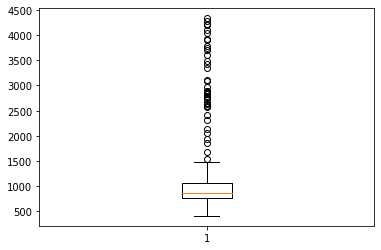

In [16]:
plt.boxplot(scfi['SCFI'])

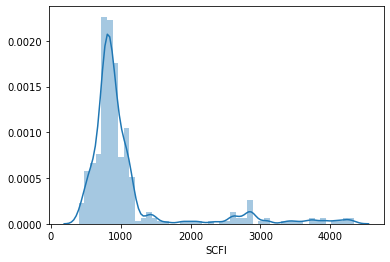

In [17]:
sns.distplot(scfi['SCFI'])

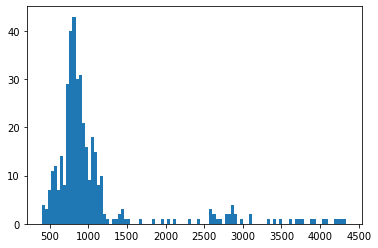

In [18]:
plt.hist(scfi['SCFI'], bins=100)
plt.show()

In [19]:
scfi['SCFI'].skew()

2.6954609328713106

In [20]:
scfi['SCFI'].kurt()

6.78241552283404

In [21]:
scfi['SCFI_boxcox'] = preprocessing.scale(boxcox(scfi['SCFI']+1)[0])

C:\Users\adore\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
scfi

,date,SCFI,SCFI_boxcox
0,2014년 01월 02일,1176.12,0.730093
1,2014년 01월 09일,1167.53,0.714697
2,2014년 01월 16일,1188.44,0.751784
3,2014년 01월 23일,1173.99,0.726296
4,2014년 01월 30일,1168.25,0.715996
...,...,...,...
385,2021년 07월 23일,4100.00,2.211776
386,2021년 07월 30일,4196.24,2.225292
387,2021년 08월 06일,4225.86,2.229327
388,2021년 08월 13일,4281.53,2.236758


In [23]:
scfi['SCFI_boxcox'].skew()

-0.05580981135126101

{'whiskers': [<matplotlib.lines.Line2D at 0x175aae19e48>,
 'caps': [<matplotlib.lines.Line2D at 0x175aae1de08>,
 'boxes': [<matplotlib.lines.Line2D at 0x175aae19608>],
 'medians': [<matplotlib.lines.Line2D at 0x175aae22d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x175aae22e88>],
 'means': []}

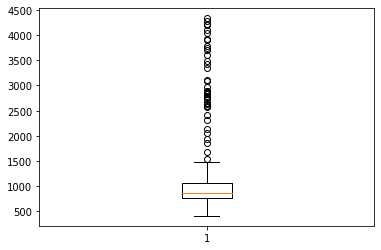

In [24]:
plt.boxplot(scfi['SCFI'])

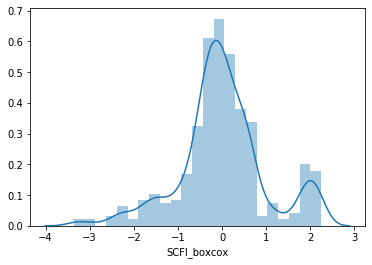

In [25]:
sns.distplot(scfi['SCFI_boxcox'])

In [26]:
scfi['SCFI_log'] = np.log(scfi['SCFI'])

C:\Users\adore\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


{'whiskers': [<matplotlib.lines.Line2D at 0x175aaf35cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x175aaf3bc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x175aaf35448>],
 'medians': [<matplotlib.lines.Line2D at 0x175aaf3dc08>],
 'fliers': [<matplotlib.lines.Line2D at 0x175aaf3dd08>],
 'means': []}

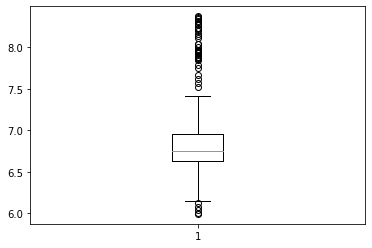

In [27]:
plt.boxplot(scfi['SCFI_log'])

In [28]:
scfi['SCFI_log'].skew()

1.5729890349983608

In [29]:
scfi['SCFI_scale'] = preprocessing.scale(scfi['SCFI'])

In [30]:
scfi['SCFI_scale'].skew()

2.695460932871309

In [31]:
scfi = scfi[['date', 'SCFI', 'SCFI_boxcox']]

In [32]:
scfi.to_csv("scfi.csv")